In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/resume-dataset/UpdatedResumeDataSet.csv


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from matplotlib import pyplot as pt

In [5]:
import matplotlib.cm as cm
import random
from wordcloud import WordCloud


In [6]:
import seaborn as sns

In [7]:
resume_bd=pd.read_csv("/kaggle/input/resume-dataset/UpdatedResumeDataSet.csv")

In [8]:
resume_bd.head(10)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [9]:
resume_bd.shape

(962, 2)

In [10]:
resume_bd.tail(10)

,Category,Resume
952,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
953,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
954,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...
955,Testing,â¢ Good logical and analytical skills â¢ Pos...
956,Testing,COMPUTER PROFICIENCY â¢ Basic: MS-Office (Pow...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [11]:
resume_bd[resume_bd["Category"]=="Testing"]

,Category,Resume
892,Testing,â¢ Good logical and analytical skills â¢ Pos...
893,Testing,COMPUTER PROFICIENCY â¢ Basic: MS-Office (Pow...
894,Testing,Computer Skills: â¢ Proficient in MS office (...
895,Testing,â Willingness to accept the challenges. â ...
896,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [12]:
resume_bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [13]:
resume_bd.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [14]:
resume_bd.isnull().sum()

Category    0
Resume      0
dtype: int64

In [15]:
resume_bd["Category"].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [16]:
resume_bd[resume_bd["Category"]=="Java Developer"]

,Category,Resume
319,Java Developer,Education Details \r\nAugust 2010 to May 2017 ...
320,Java Developer,Technical Skills (Trained / Project Acquired S...
321,Java Developer,"TECHNICAL SKILLS Skills: Java, SQL, PL/SQL, C,..."
322,Java Developer,TECHNICAL STRENGTHS Computer Language Java/J2E...
323,Java Developer,Education Details \r\nJanuary 2013 Master of E...
...,...,...
398,Java Developer,"Computer Skills: Languages And Script: JSP, Se..."
399,Java Developer,Education Details \r\nJanuary 2016 B.E Informa...
400,Java Developer,TECHNICAL SKILLS Programming Languages: Java (...
401,Java Developer,SKILLS: - 1) Team leading 2) Self-motivated 3)...


In [17]:
resume_bd[resume_bd["Category"]=="Sales"]

,Category,Resume
225,Sales,Education Details \r\n Bachelor's \r\n Bache...
226,Sales,SKILLS 1. MS-Office 2. Good Communication skil...
227,Sales,KEY SKILLS: â¢ Planning & Strategizing â¢ Pr...
228,Sales,IT Skills: MS Office. Photoshop. SQL Server.Ed...
229,Sales,Skill Sets: â¢ Multi-tasking â¢ Collaborativ...
230,Sales,Education Details \r\n Bachelor's \r\n Bache...
231,Sales,SKILLS 1. MS-Office 2. Good Communication skil...
232,Sales,KEY SKILLS: â¢ Planning & Strategizing â¢ Pr...
233,Sales,IT Skills: MS Office. Photoshop. SQL Server.Ed...
234,Sales,Skill Sets: â¢ Multi-tasking â¢ Collaborativ...


In [18]:
resume_bd[resume_bd["Category"]=="Business Analyst"]

,Category,Resume
403,Business Analyst,Education Details \r\n BE Computer Science Mum...
404,Business Analyst,"Technical Skills Application Servers: IIS 6.0,..."
405,Business Analyst,Key Skills - Requirement Gathering - Requireme...
406,Business Analyst,IT Skills: Area Exposure Modeling Tool: Bizagi...
407,Business Analyst,TECHNOLOGICAL SKILLS â¦ Knowledge of Computer...
408,Business Analyst,Education Details \r\nFebruary 2006 to Februar...
409,Business Analyst,Key Skills - Requirement Gathering - Requireme...
410,Business Analyst,IT Skills: Area Exposure Modeling Tool: Bizagi...
411,Business Analyst,TECHNOLOGICAL SKILLS â¦ Knowledge of Computer...
412,Business Analyst,Education Details \r\nFebruary 2006 to Februar...


In [19]:
resume_bd.nunique()

Category     25
Resume      166
dtype: int64

In [20]:
resume_bd.Category.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [21]:
categories = resume_bd.Resume.value_counts().to_frame().reset_index()
categories.columns = ['Job', 'Count']
categories

,Job,Count
0,"Technical Skills Web Technologies: Angular JS,...",18
1,Skills VISA B1-VISA (USA) Onsite Visits to Swe...,17
2,Software Proficiency: â¢ Languages: Basics of...,17
3,CORE COMPETENCIES ~ Ant ~ Maven ~ GIT ~ Bitbuc...,17
4,"TECHNICALSKILLS SpringMVC, Hibernate, JDBC, Ja...",12
...,...,...
161,TECHNICAL SKILLS Languages: Core Java Automati...,2
162,"TECHNICAL SKILLS â¢ HP ALM, RTC and JIRA â¢ ...",1
163,Total IT Experience 15 years. Core expertise i...,1
164,Core skills â¢ Project / Program Management â...,1


In [22]:
categories = resume_bd.Category.value_counts().to_frame().reset_index()
categories.columns = ['Job', 'Count']
categories

,Job,Count
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


In [23]:
df1= resume_bd.copy()
df1['Processed_resume']= ""
df1

,Category,Resume,Processed_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,
958,Testing,â Willingness to accept the challenges. â ...,
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,


<Axes: >

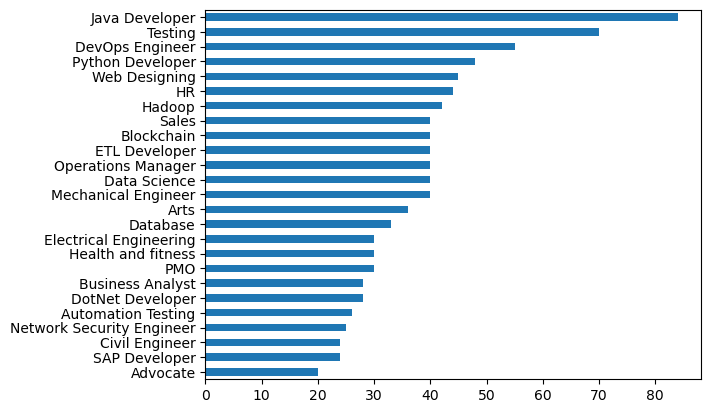

In [24]:
resume_bd.Category.value_counts().sort_values().plot(kind='barh')

CATEGORIES IN RESUME DATABASE


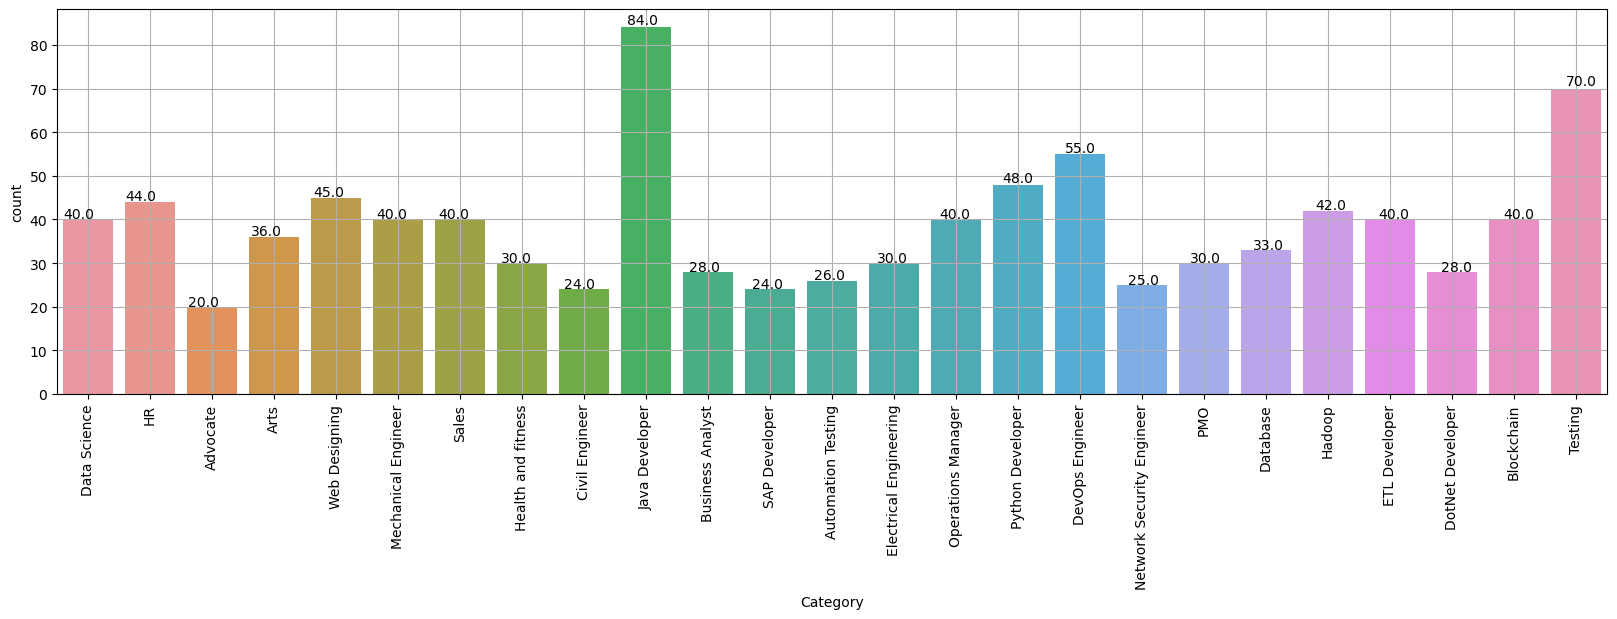

In [25]:
print("CATEGORIES IN RESUME DATABASE")
pt.figure(figsize=(20,5))
pt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=resume_bd)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
pt.grid()